# Explore here

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import uniform, norm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [34]:
# Load the data from the URL
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
# Separate features from labels
labels=df['Outcome']
features=df.drop('Outcome', axis=1)

# Split the data into training and testing features and labels
X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.25,
    random_state=315
)

In [39]:
X_train
# y_train
# X_test
# y_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
10,4,110,92,0,0,37.6,0.191,30
529,0,111,65,0,0,24.6,0.660,31
131,9,122,56,0,0,33.3,1.114,33
187,1,128,98,41,58,32.0,1.321,33
409,1,172,68,49,579,42.4,0.702,28
...,...,...,...,...,...,...,...,...
275,2,100,70,52,57,40.5,0.677,25
746,1,147,94,41,0,49.3,0.358,27
194,8,85,55,20,0,24.4,0.136,42
567,6,92,62,32,126,32.0,0.085,46


In [40]:
model = RandomForestClassifier(n_estimators = 60, random_state = 42)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=42)

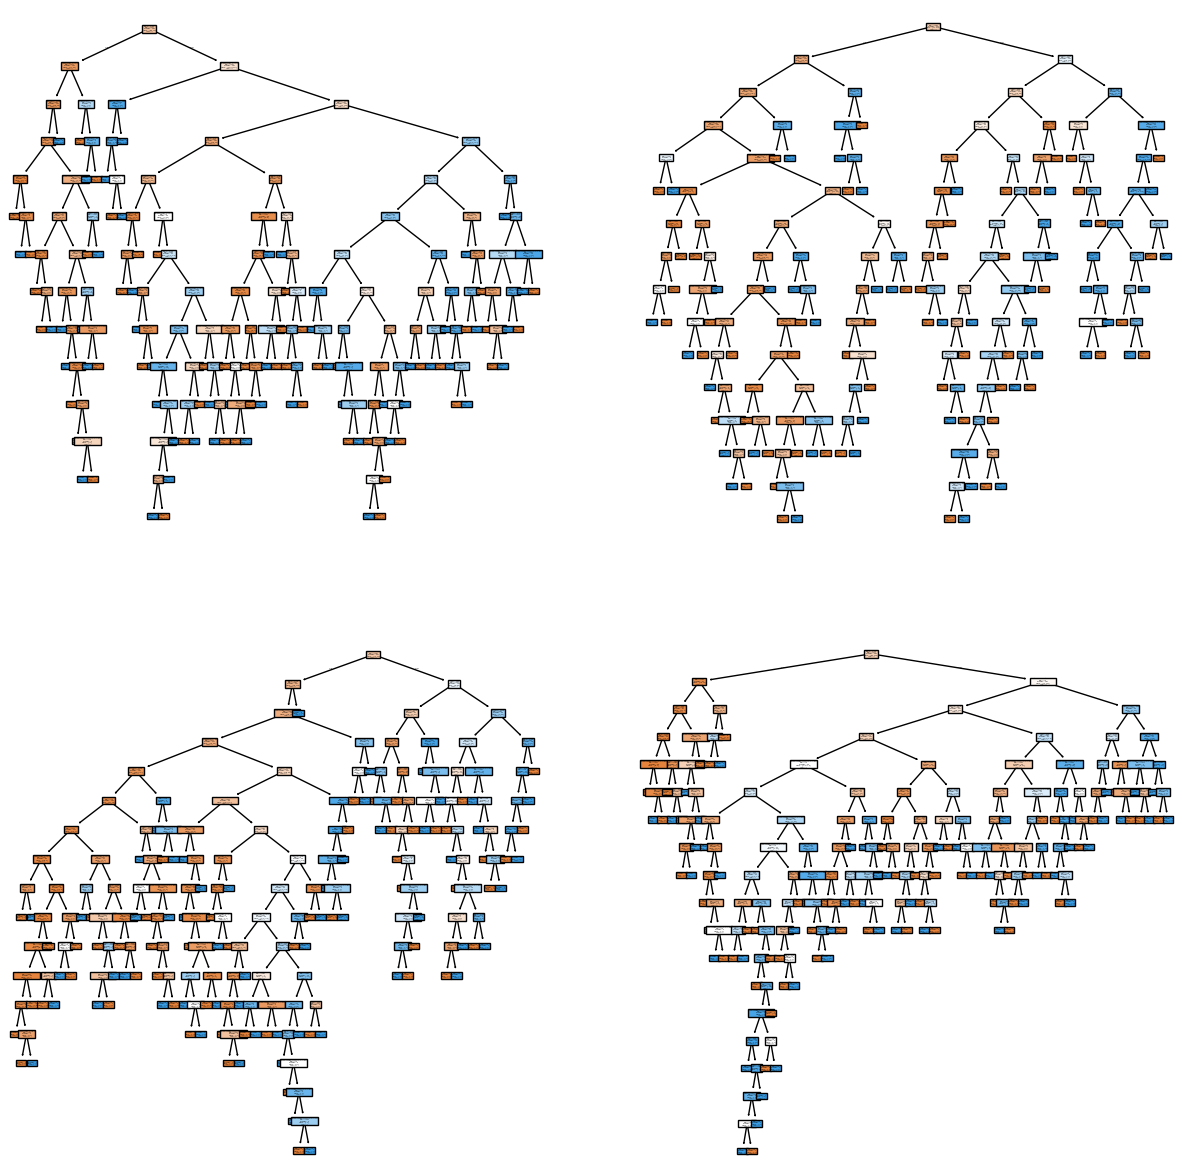

In [41]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Showing first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [42]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0])

In [43]:
accuracy_score(y_test, y_pred)

0.7552083333333334

In [44]:
from sklearn.metrics import mean_squared_error

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

Mean squared error: 0.24479166666666666


In [45]:
from pickle import dump

dump(model, open("../models/ranfor_classifier_nestimators-60_42_test2.sav", "wb"))

In [46]:
grid = { 
    'n_estimators': [50, 60, 100, 150, 200, 300], #375, 350, 400, 425, 450, 475, 500
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [42]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 150,
 'random_state': 42}

In [ ]:
rf = RandomForestClassifier(n_estimators = 150, max_depth = 6, max_features = 'sqrt', random_state = 42, criterion = 'gini').fit(X_train, y_train)

In [ ]:
prediction = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, prediction)

0.78125